#FINAL STATISTICS PROJECT FOR DATA SCIENCE



###Dataset

The *dataset* consists of official statistical data from the 11,538 athletes who participated in the 2016 Olympic Games in Rio de Janeiro. It includes the name, nationality (in 3-digit code), gender, date of birth, height in meters, weight in kilograms, sport, and the number of gold, silver, and/or bronze medals won by the respective athletes.

Source: [Kaggle](https://www.kaggle.com/rio2016/olympic-games/)

For disciplinary purposes:

* we acquired the age of each athlete (for August/2016) from their date of birth, thus generating a new column *age*;

* we excluded the columns *id*, *name*, and *dob*.

Below, we present additional information about the chosen dataset.

#### Pacotes

In [ ]:
# Required packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import statsmodels.stats.proportion as smp
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import t,norm,chi2_contingency,ttest_ind

#To remove warning from graphs
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/Shared drives/tp_estatistica/athletes.csv')
dataset

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [ ]:
#Original copy for report section
df_copy = dataset.copy()

##Build appropriate tables and graphs for each dataframe variable

#### Pre-processing of the base

In [ ]:
#Calculating age
today = pd.to_datetime('08/01/2016') #Primeiro dia do mês das Olimpíadas de 2016.

df_copy['dob'] = pd.to_datetime(df_copy['dob'], format='%m/%d/%y')
df_copy['dob'] = df_copy['dob'].where(df_copy['dob'] < today, df_copy['dob'] -  np.timedelta64(100, 'Y'))
df_copy['age'] = (today - df_copy['dob']).astype('<m8[Y]')
df_copy['age'] = df_copy.age.fillna(0).astype(int)


In [ ]:
#Removing NaN
df_copy.dropna(inplace = True)

In [ ]:
#Removing the id, name, dob columns
df_copy.drop(columns = ['id', 'name', 'dob'], inplace = True)
df_copy

,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,ESP,male,1.72,64.0,athletics,0,0,0,46
1,KOR,female,1.68,56.0,fencing,0,0,0,29
2,CAN,male,1.98,79.0,athletics,0,0,1,24
3,MDA,male,1.83,80.0,taekwondo,0,0,0,25
4,NZL,male,1.81,71.0,cycling,0,0,0,25
...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,20
11534,CZE,female,1.73,63.0,athletics,0,0,0,29
11535,CHN,male,1.85,100.0,wrestling,0,0,0,25
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,27


####Number of athletes by gender

In [ ]:
#Acquisition of existing genres in the dataset and their respective amounts of participants.
fem_masc = df_copy['sex'].groupby(df_copy.sex).count()
genero = fem_masc.index.array
valores = fem_masc.array

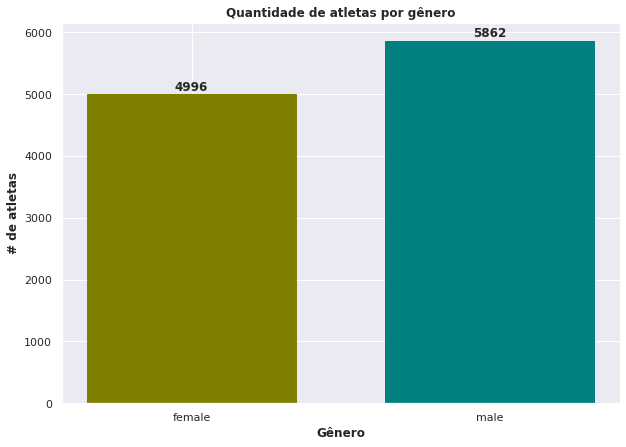

In [ ]:
#Graph showing number of athletes by gender
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax  = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = genero, height = valores, width = 0.7)
barras[0].set_color('olive')
barras[1].set_color('teal')

plt.title('Quantidade de atletas por gênero', fontweight = 'bold')
plt.xlabel('Gênero', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

for index, data in enumerate(valores):
  #plt.text(x = (index-0.04), y = (data*1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))
  plt.text(x = index, y = (data*1.013), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))
plt.show()

The *dataset* has more male athletes than female athletes, with a difference of 866 people between them. This graph confirms what we typically see in the Olympics in relation to the participating genders.

####Number of athletes by age

In [ ]:
idade_atletas = df_copy['age'].groupby(df_copy.age).count()
idades = idade_atletas.index.array
quantidades = idade_atletas.array

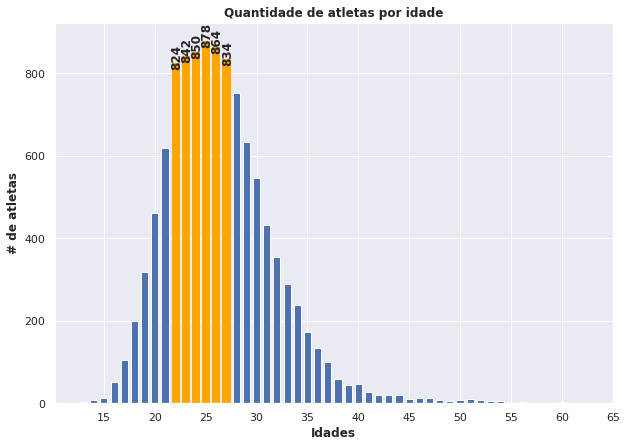

In [ ]:
#Graph showing number of athletes by age
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = idades, height = quantidades, width = 0.7)
barras[9].set_color('orange')
barras[10].set_color('orange')
barras[11].set_color('orange')
barras[12].set_color('orange')
barras[13].set_color('orange')
barras[14].set_color('orange')

plt.title('Quantidade de atletas por idade', fontweight = 'bold')
plt.xlabel('Idades', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

plt.xticks(np.arange(15, 70, step = 5))

for index, data in enumerate(quantidades):
  if 824 <= data <= 878:
    plt.text(x = (index+12.5), y = (data*0.99), s = data, rotation = '90', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

We have the most instances with ages ranging from 22 to 27, with the highest age being 25.

It is also interesting that we have Olympic athletes with ages up to almost 55 years old. The youngest athlete in this dataset is under 15 years old.

####Number of athletes by height

In [ ]:
altura_atletas = df_copy['height'].groupby(df_copy.height).count()
alturas = altura_atletas.index.array
valores = altura_atletas.array

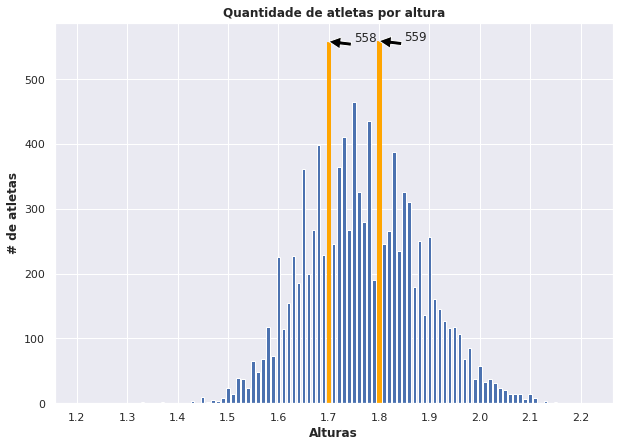

In [ ]:
#Graph showing number of athletes by height
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = alturas, height = valores, width = -0.007)
barras[34].set_color('orange')
barras[44].set_color('orange')

plt.title('Quantidade de atletas por altura', fontweight = 'bold')
plt.xlabel('Alturas', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

plt.xticks(np.arange(1.2, 2.21, step = 0.1))

plt.annotate('558', xy = (1.7, 558), xytext = (1.75, 558), arrowprops = dict(facecolor = 'black'))
plt.annotate('559', xy = (1.8, 559), xytext = (1.85, 559), arrowprops = dict(facecolor = 'black'))

plt.show()

The heights with the highest number of athletes are 1.70cm (558) and 1.80cm (559). This behavior may be explained by the fact that most athletes are male, as shown previously.

####Number of athletes by weight

In [ ]:
peso_atletas = df_copy['weight'].groupby(df_copy.weight).count()
pesos = peso_atletas.index.array
quantidades = peso_atletas.array

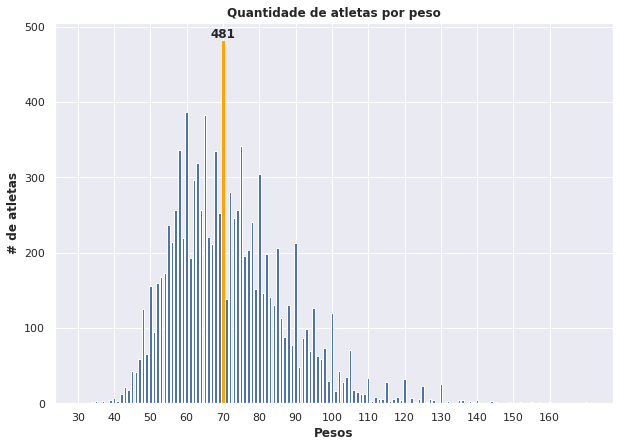

In [ ]:
#Graph showing number of athletes by weight
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = pesos, height = quantidades, width = 0.7)
barras[37].set_color('orange')

plt.title('Quantidade de atletas por peso', fontweight = 'bold')
plt.xlabel('Pesos', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

plt.xticks(np.arange(30, 170, step = 10))

for index, data in enumerate(quantidades):
  if data == 481:
    plt.text(x = (index/0.555), y = (data*1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

The weight with the highest number of athletes is 70kg (481).

####Number of medals by category and nationality

In [ ]:
def sum_medals(_df):
  lista = list()

  for index, row in _df.iterrows():
    cont = 0
    cont = row['gold'] + row['silver'] + row['bronze']
    lista.append(cont)

  return lista

In [ ]:
df_agrupado_medalhas = df_copy[['gold', 'silver', 'bronze']].groupby(by=df_copy['nationality']).sum()
df_agrupado_medalhas['total'] = sum_medals(df_agrupado_medalhas)
df_agrupado_medalhas = df_agrupado_medalhas.sort_values('total', ascending= False).head(15)
df_agrupado_medalhas

,gold,silver,bronze,total
nationality,,,,
USA,136,52,70,258
GER,49,44,66,159
GBR,63,54,24,141
CHN,46,29,34,109
RUS,51,25,31,107
FRA,18,52,19,89
AUS,23,34,25,82
ITA,8,40,24,72
CAN,4,4,61,69


In [ ]:
df_agrupado_medalhas.reset_index(inplace = True)
df_agrupado_medalhas.columns = ['nationality', 'gold', 'silver', 'bronze','total']

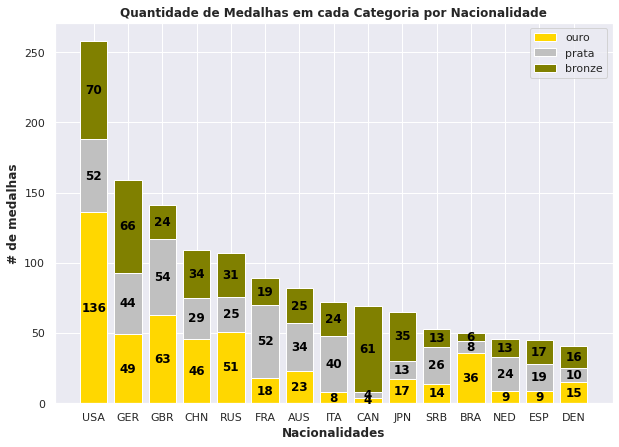

In [ ]:
#Gráfico de quantidade de medalhas em cada categoria por nacionalidade
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

nacionalidades = ['USA', 'GER', 'GBR', 'CHN', 'RUS', 'FRA', 'AUS', 'ITA', 'CAN', 'JPN', 'SRB', 'BRA', 'NED', 'ESP', 'DEN']
ouro = [136, 49, 63, 46, 51, 18, 23, 8, 4, 17, 14, 36, 9, 9, 15]
prata = [52, 44, 54, 29, 25, 52, 34, 40, 4, 13, 26, 8, 24, 19, 10]
bronze = [70, 66, 24, 34, 31, 19, 25, 24, 61, 35, 13, 6, 13, 17, 16]

ax1 = ax.bar(x = nacionalidades, height = ouro, label = 'ouro', color = 'gold')
ax2 = ax.bar(x = nacionalidades, height = prata, label = 'prata', bottom = ouro, color = 'silver')
ax3 = ax.bar(x = nacionalidades, height = bronze, label = 'bronze', bottom = np.array(ouro) + np.array(prata), color = 'olive')


plt.title('Quantidade de Medalhas em cada Categoria por Nacionalidade', fontweight = 'bold')
plt.xlabel('Nacionalidades', fontweight = 'bold')
plt.ylabel('# de medalhas', fontweight = 'bold')

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()

    if h1 != 0:
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h2 != 0:
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h3 != 0:
      plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

The nationalities that have the highest number of medals, in total, are the United States, Germany, Great Britain, China and Russia. These are the only countries whose counts reach the third digit.

#### Number of medals won by groups

In [ ]:
def sum_count (_df, coluna1, coluna2, coluna3, condicao):
  cont = 0

  if (condicao == 1):  #apenas um tipo de medalha, as demais são 0
    for index, row in _df.iterrows():
      if( row[coluna1] > 0 and row[coluna2] == 0 and row[coluna3] == 0):
        cont = cont + 1
  elif (condicao == 2): #conta duas medalhas
    for index, row in _df.iterrows():
      if( row[coluna1] > 0 and row[coluna2] > 0 and row[coluna3] == 0):
        cont = cont + 1
  elif (condicao == 3):
    for index, row in _df.iterrows():
      if( row[coluna1] > 0 and row[coluna2] > 0 and row[coluna3] > 0):
        cont = cont + 1
  else:
    #ganhou nenhuma medalha
    for index, row in _df.iterrows():
      if( row[coluna1] == 0 and row[coluna2] == 0 and row[coluna3] == 0):
        cont = cont + 1

  return cont

Qntde. de atletas que receberam somente uma das 3 medalhas:



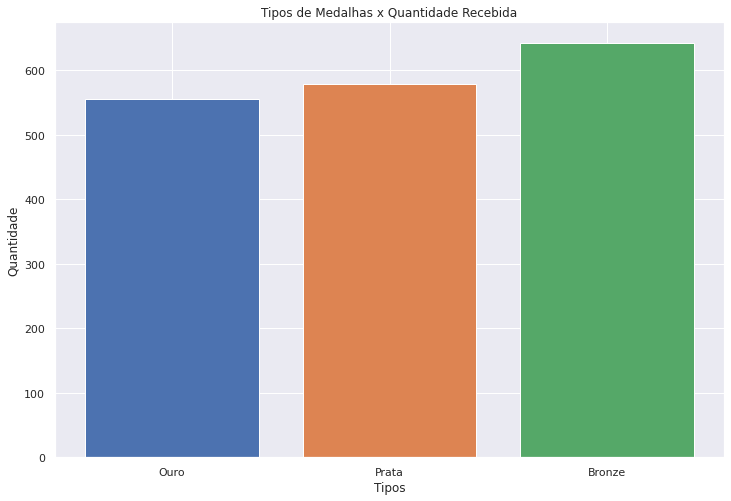

In [ ]:
#Graph showing number of medals per athlete
#Only one type of medal received.

print("Qntde. de atletas que receberam somente uma das 3 medalhas:\n")

plt.bar("Ouro", sum_count(dataset, "gold", "silver", "bronze", 1))

plt.bar("Prata", sum_count(dataset, "silver", "gold", "bronze", 1))

plt.bar("Bronze", sum_count(dataset, "bronze", "gold", "silver", 1))

plt.xlabel('Tipos')
plt.ylabel('Quantidade')

plt.title('Tipos de Medalhas x Quantidade Recebida')

plt.show()

Comparing the data in the graph above, we see that we have a greater number of athletes who received only bronze medals throughout the Olympics.

Qntde. de atletas que receberam mais de um tipo de medalha:



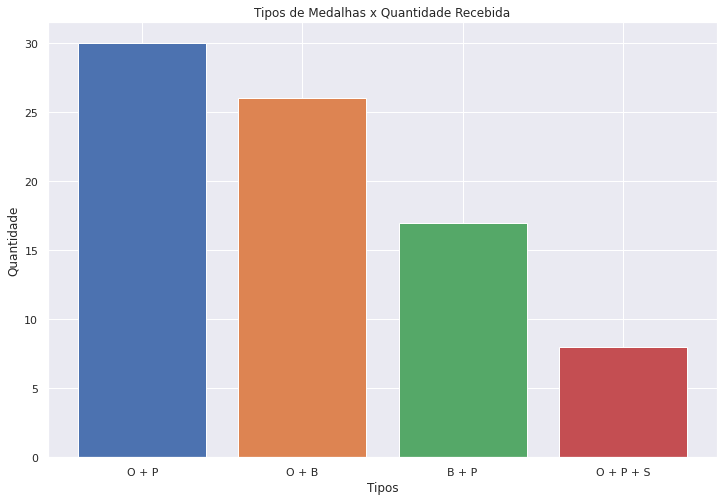

In [ ]:
print("Qntde. de atletas que receberam mais de um tipo de medalha:\n")

plt.bar("O + P", sum_count(dataset, "gold", "silver", "bronze", 2))

plt.bar("O + B", sum_count(dataset, "gold", "bronze", "silver", 2))

plt.bar("B + P", sum_count(dataset, "silver", "bronze", "gold", 2))

plt.bar("O + P + S", sum_count(dataset, "gold", "bronze", "silver", 3))

plt.xlabel('Tipos')
plt.ylabel('Quantidade')

plt.title('Tipos de Medalhas x Quantidade Recebida')

plt.show()

The graph above shows that we have 30 athletes who received both gold and silver medals. This is the largest count, followed by gold and bronze, silver and bronze, and the combination of all 3 medals.

It was also discovered that we have over 9,500 athletes who did not receive any medals.

In [ ]:
print("Quantia de Atletas que receberam nenhuma medalha:", sum_count(dataset, "bronze", "gold", "silver", 4))

Quantia de Atletas que receberam nenhuma medalha: 9681


#### TOP 10 Nationalities x Quantity. of Athletes

In [ ]:
#Dataframe containing the ascending quantity of each nationality
df_paises = dataset['nationality'].value_counts().to_frame()
df_paises = df_paises.rename(columns = {'nationality':'qntd'})
df_paises['nationality'] = df_paises.index
df_paises.reset_index(drop=True, inplace=True)
df_paises = df_paises[['nationality','qntd']]
df_paises.sort_values(ascending=False, inplace=True, by='qntd')

<Figure size 864x576 with 0 Axes>

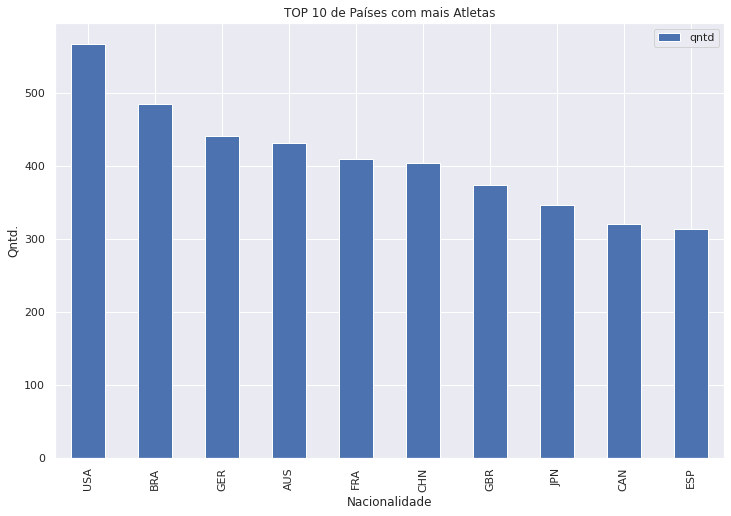

In [ ]:
#Graph with TOP 10 nationalities with the most athletes
fig = plt.figure(figsize = (12, 8))
df_paises.head(10).plot(kind='bar', x='nationality', y='qntd')
plt.xlabel('Nacionalidade')
plt.ylabel('Qntd.')
plt.title('TOP 10 de Países com mais Atletas')
plt.show()

The United States, Brazil, Germany, Australia, France and China have the largest number of athletes present at the Olympic Games, with more than 500 American athletes.

The presence of the United States, Germany, China and Great Britain in this TOP 10 can be correlated with the quantitative classification of medals in the previous session.

<Figure size 864x576 with 0 Axes>

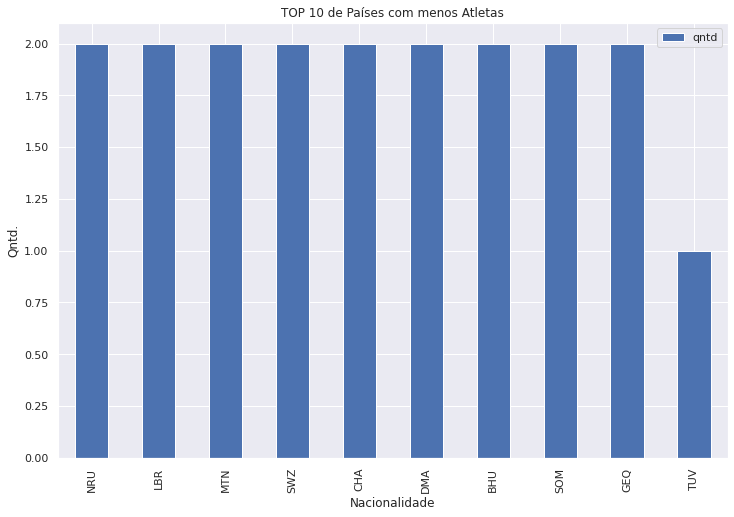

In [ ]:
#Graph with TOP 10 nationalities with the fewest athletes
fig = plt.figure(figsize = (12, 8))
df_paises.tail(10).plot(kind='bar', x='nationality', y='qntd')
plt.xlabel('Nacionalidade')
plt.ylabel('Qntd.')
plt.title('TOP 10 de Países com menos Atletas')
plt.show()

With the graph above, we can see that the country with the smallest number of Olympic athletes is Tuvalu (number = 1). The other countries have 2 athletes each.

#### Number of athletes per sport

In [ ]:
esporte_atletas = df_copy['sport'].groupby(df_copy.sport).count()
esporte_atletas

sport
aquatics             1396
archery               126
athletics            2187
badminton             164
basketball            284
canoe                 327
cycling               502
equestrian            215
fencing               245
football              583
golf                  115
gymnastics            319
handball              349
hockey                432
judo                  377
modern pentathlon      72
rowing                535
rugby sevens          296
sailing               372
shooting              380
table tennis          168
taekwondo             125
tennis                191
triathlon             109
volleyball            382
weightlifting         258
wrestling             349
Name: sport, dtype: int64

In [ ]:
esportes = esporte_atletas.index.array
esportes

<PandasArray>
[         'aquatics',           'archery',         'athletics',
         'badminton',        'basketball',             'canoe',
           'cycling',        'equestrian',           'fencing',
          'football',              'golf',        'gymnastics',
          'handball',            'hockey',              'judo',
 'modern pentathlon',            'rowing',      'rugby sevens',
           'sailing',          'shooting',      'table tennis',
         'taekwondo',            'tennis',         'triathlon',
        'volleyball',     'weightlifting',         'wrestling']
Length: 27, dtype: object

In [ ]:
quantidades = esporte_atletas.array
quantidades

<PandasArray>
[1396,  126, 2187,  164,  284,  327,  502,  215,  245,  583,  115,  319,  349,
  432,  377,   72,  535,  296,  372,  380,  168,  125,  191,  109,  382,  258,
  349]
Length: 27, dtype: int64

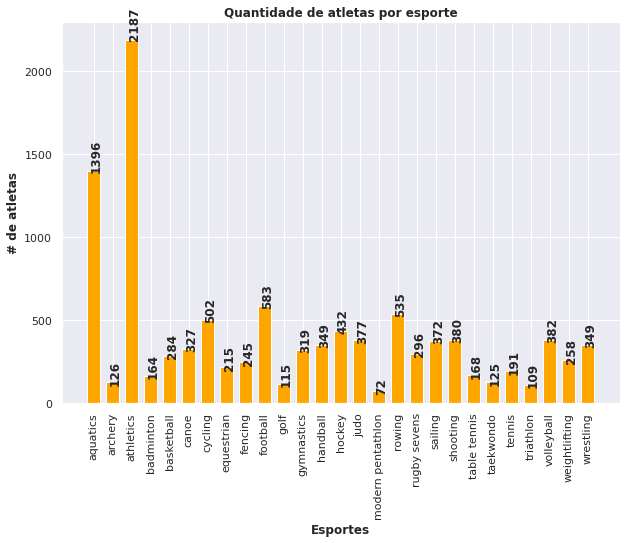

In [ ]:
#Graph showing number of athletes by sport
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

ax.bar(x = esportes, height = quantidades, width = 0.7, color = 'orange')

plt.title('Quantidade de atletas por esporte', fontweight = 'bold')
plt.xlabel('Esportes', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')
plt.xticks(rotation = 90)

for index, data in enumerate(quantidades):
    plt.text(x = (index-0.2), y = (data*1.01), s = data, rotation = '90', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

The sports with the most athletes are aquatics (1396) and track and field (2187). This may be related to the height results shown above, as athletes in both sports tend to be tall.

#### Number of medals by category and by sport

In [ ]:
df_agrupado_medalhas = df_copy[['gold', 'silver', 'bronze']].groupby(by=df_copy['sport']).sum()
df_agrupado_medalhas['total'] = sum_medals(df_agrupado_medalhas)
df_agrupado_medalhas = df_agrupado_medalhas.sort_values('total', ascending= False).head(15)
df_agrupado_medalhas

,gold,silver,bronze,total
sport,,,,
aquatics,119,110,106,335
athletics,64,61,58,183
rowing,48,48,44,140
hockey,34,32,33,99
football,36,36,18,90
gymnastics,30,30,30,90
cycling,27,27,29,83
volleyball,28,27,28,83
canoe,27,27,28,82


In [ ]:
df_agrupado_medalhas.reset_index(inplace = True)
df_agrupado_medalhas.columns = ['sport', 'gold', 'silver', 'bronze','total']
df_agrupado_medalhas.values

array([['aquatics', 119, 110, 106, 335],
       ['athletics', 64, 61, 58, 183],
       ['rowing', 48, 48, 44, 140],
       ['hockey', 34, 32, 33, 99],
       ['football', 36, 36, 18, 90],
       ['gymnastics', 30, 30, 30, 90],
       ['cycling', 27, 27, 29, 83],
       ['volleyball', 28, 27, 28, 83],
       ['canoe', 27, 27, 28, 82],
       ['handball', 29, 30, 15, 74],
       ['rugby sevens', 25, 24, 25, 74],
       ['basketball', 24, 24, 24, 72],
       ['wrestling', 18, 18, 35, 71],
       ['fencing', 21, 22, 22, 65],
       ['judo', 14, 14, 28, 56]], dtype=object)

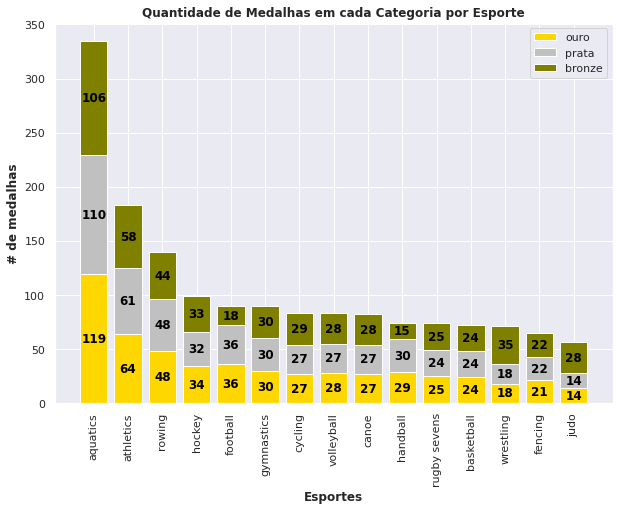

In [ ]:
#Graph of number of medals in each category by sport
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

esportes = ['aquatics', 'athletics', 'rowing', 'hockey', 'football', 'gymnastics', 'cycling', 'volleyball', 'canoe', 'handball', 'rugby sevens', 'basketball', 'wrestling', 'fencing', 'judo']
ouro = [119, 64, 48, 34, 36, 30, 27, 28, 27, 29, 25, 24, 18, 21, 14]
prata = [110, 61, 48, 32, 36, 30, 27, 27, 27, 30, 24, 24, 18, 22, 14]
bronze = [106, 58, 44, 33, 18, 30, 29, 28, 28, 15, 25, 24, 35, 22, 28]

ax1 = ax.bar(x = esportes, height = ouro, label = 'ouro', color = 'gold')
ax2 = ax.bar(x = esportes, height = prata, label = 'prata', bottom = ouro, color = 'silver')
ax3 = ax.bar(x = esportes, height = bronze, label = 'bronze', bottom = np.array(ouro) + np.array(prata), color = 'olive')

plt.title('Quantidade de Medalhas em cada Categoria por Esporte', fontweight = 'bold')
plt.xlabel('Esportes', fontweight = 'bold')
plt.ylabel('# de medalhas', fontweight = 'bold')
plt.xticks(rotation = 90)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()

    if h1 != 0:
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h2 != 0:
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h3 != 0:
      plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

The sports with the most medals are aquatics (335) and athletics (183). This behavior may have been influenced by the fact that these two sports are also those with the largest number of athletes, as shown previously.

##Calculate the mean, median, mode, standard deviation, coefficient of variation and symmetry of quantitative variables

In [ ]:
#Função que calcula o coeficiente de variância, dado um conjunto de dados unidimensional

def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)

### General basis

In [ ]:
#Dataframe that contains basic statistical information about the dataset
df_stats = pd.DataFrame({
    'coluna':['Idade (age)', 'Altura (height)', 'Peso (weight)'],
    'media':[round(st.mean(df_copy.age),5 ), round(st.mean(df_copy.height),5 ), round(st.mean(df_copy.weight),5 )],
    'mediana':[st.median(df_copy.age), st.median(df_copy.height), st.median(df_copy.weight)],
    'moda':[st.mode(df_copy.age), st.mode(df_copy.height), st.mode(df_copy.weight)],
    'd-p':[round(st.pstdev(df_copy.age), 2 ), round(st.pstdev(df_copy.height), 2 ), round(st.pstdev(df_copy.weight), 2 )],
    'c-v':[cv(df_copy.age), cv(df_copy.height), cv(df_copy.weight)],
    'simetria':[round(df_copy.age.skew(), 5), round(df_copy.height.skew(), 5), round(df_copy.weight.skew(), 5)]
})

In [ ]:
#Dataset statistical data table.
df_stats

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),26.41177,26.00,25.0,5.40,20.43,1.11795
1,Altura (height),1.76694,1.76,1.8,0.11,6.40,0.16531
2,Peso (weight),72.07092,70.00,70.0,16.16,22.43,1.05906


* Age:
  * Mean > Median < Mode
*Height:
  * Mean > Median < Mode
* Weight:
  * Mean > Median = Mode

### Base with male gender

In [ ]:
df_men =  df_copy[df_copy.sex == 'male']
df_stats_men = pd.DataFrame({
    'coluna':['Idade (age)', 'Altura (height)', 'Peso (weight)'],
    'media':[round(st.mean(df_men.age),5 ), round(st.mean(df_men.height),5 ), round(st.mean(df_men.weight),5 )],
    'mediana':[st.median(df_men.age), st.median(df_men.height), st.median(df_men.weight)],
    'moda':[st.mode(df_men.age), st.mode(df_men.height), st.mode(df_men.weight)],
    'd-p':[round(st.pstdev(df_men.age), 2 ), round(st.pstdev(df_men.height), 2 ), round(st.pstdev(df_men.weight), 2 )],
    'c-v':[cv(df_men.age), cv(df_men.height), cv(df_men.weight)],
    'simetria':[round(df_men.age.skew(), 5), round(df_men.height.skew(), 5), round(df_men.weight.skew(), 5)]
})

In [ ]:
#Statistical data table of the male dataset.
df_stats_men

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),26.88383,26.00,26.0,5.48,20.37,1.22447
1,Altura (height),1.82387,1.82,1.8,0.10,5.49,0.05981
2,Peso (weight),80.11873,78.00,70.0,15.38,19.20,1.12085


* Age:
  * Mean > Median = Mode
*Height:
  * Mean = Median = Mode
* Weight:
  * Mean > Median > Mode





### Base with female gender

In [ ]:
df_women =  df_copy[df_copy.sex == 'female']
df_stats_women = pd.DataFrame({
    'coluna':['Idade (age)', 'Altura (height)', 'Peso (weight)'],
    'media':[round(st.mean(df_women.age),2 ), round(st.mean(df_women.height),2 ), round(st.mean(df_women.weight),2 )],
    'mediana':[round(st.median(df_women.age), 2), round(st.median(df_women.height), 2), round(st.median(df_women.weight), 2)],
    'moda':[round(st.mode(df_women.age), 2), round(st.mode(df_women.height), 2), round(st.mode(df_women.weight), 2)],
    'd-p':[round(st.pstdev(df_women.age), 2 ), round(st.pstdev(df_women.height), 2 ), round(st.pstdev(df_women.weight), 2 )],
    'c-v':[cv(df_women.age), cv(df_women.height), cv(df_women.weight)],
    'simetria':[round(df_women.age.skew(), 5), round(df_women.height.skew(), 5), round(df_women.weight.skew(), 5)]
})

In [ ]:
#Statistical data table of the female dataset.
df_stats_women

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),25.86,25.0,25.0,5.24,20.28,0.98152
1,Altura (height),1.70,1.7,1.7,0.09,5.19,0.11376
2,Peso (weight),62.63,61.0,58.0,11.18,17.85,1.43449


* Age:
  * Mean > Median = Mode
* Height:
  * Mean = Median = Mode
* Weight:
  * Mean > Median > Mode


##Analyze the normality of numerical data and whether there are outliers

####Age

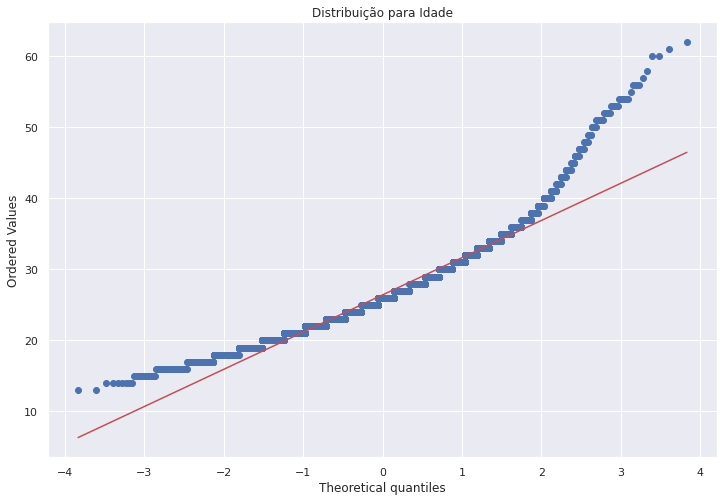

In [ ]:
# Generating a graph to check if the distribution is normal
# age
fig, ax = plt.subplots()
stats.probplot(df_copy.age, fit=True, plot=ax)
plt.title("Distribuição para Idade")
plt.show()

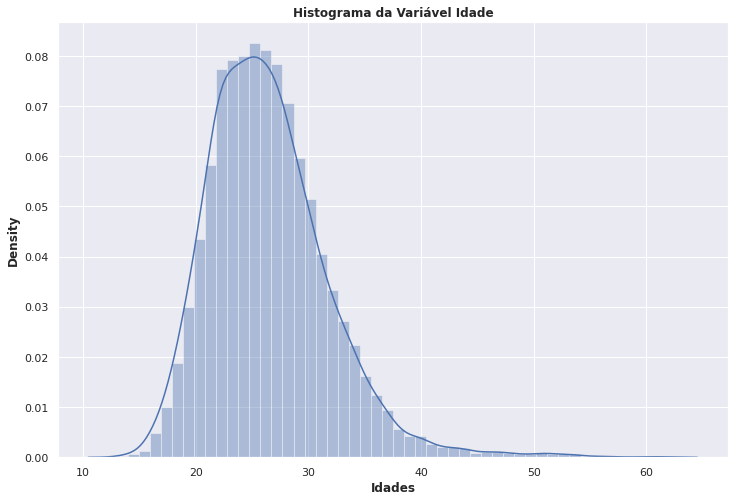

In [ ]:
#Histogram of the Age Variable
sns.distplot(df_copy.age);

plt.title('Histograma da Variável Idade', fontdict={'fontweight' : 'bold'});
plt.xlabel('Idades', fontweight = 'bold');
plt.ylabel(ylabel = 'Density', fontweight = 'bold');

In [ ]:
# Running the Shapiro Wilk test
# The first value is the result of the statistic and the second argument is the p-value.
# Ho = The data are normally distributed
# H1 = The data are not normally distributed
# If the second term (p-value) is less than 0.05 (5%), the null hypothesis is rejected.
stats.shapiro(df_copy.age)

(0.9433720707893372, 0.0)

The null hypothesis (H0) is rejected, as the p-value is less than 0.05. Therefore, the data do not have a normal distribution.

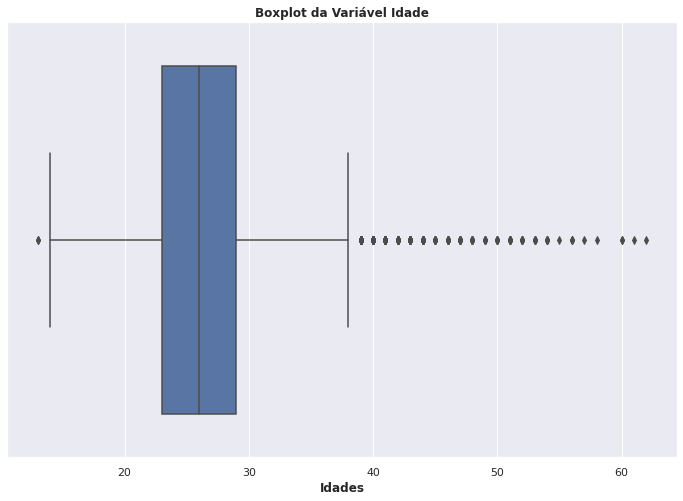

In [ ]:
#Boxplot of Age Variable
sns.boxplot(df_copy.age);

plt.title('Boxplot da Variável Idade', fontdict={'fontweight' : 'bold'});
plt.xlabel('Idades', fontweight = 'bold');

####Height

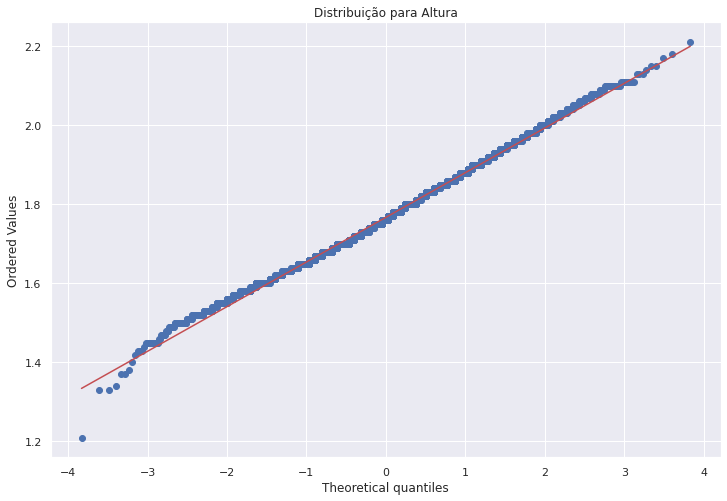

In [ ]:
# Generating a graph to check if the distribution is normal
# height
fig, ax = plt.subplots()
stats.probplot(df_copy.height, fit=True, plot=ax)
plt.title("Distribuição para Altura")
plt.show()

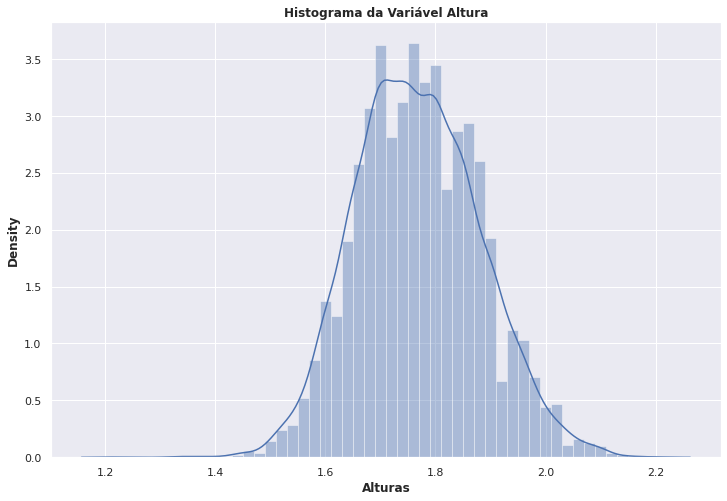

In [ ]:
#Histogram of the Height Variable
sns.distplot(df_copy.height);

plt.title('Histograma da Variável Altura', fontdict={'fontweight' : 'bold'});
plt.xlabel('Alturas', fontweight = 'bold');
plt.ylabel(ylabel = 'Density', fontweight = 'bold');

In [ ]:
# Running the Shapiro Wilk test
# The first value is the result of the statistic and the second argument is the p-value.
# Ho = The data are normally distributed
# H1 = The data are not normally distributed
# If the second term (p-value) is less than 0.05 (5%), the null hypothesis is rejected.
stats.shapiro(df_copy.height)

(0.9965190291404724, 2.1925333490229685e-15)

The null hypothesis (H0) is rejected, as the p-value is less than 0.05. Therefore, the data do not have a normal distribution.

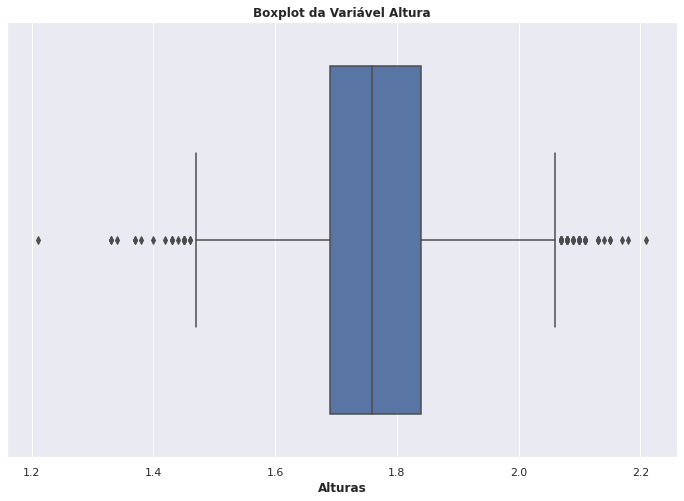

In [ ]:
#Boxplot of Height Variable
sns.boxplot(df_copy.height);

plt.title('Boxplot da Variável Altura', fontdict={'fontweight' : 'bold'});
plt.xlabel('Alturas', fontweight = 'bold');

####Weight

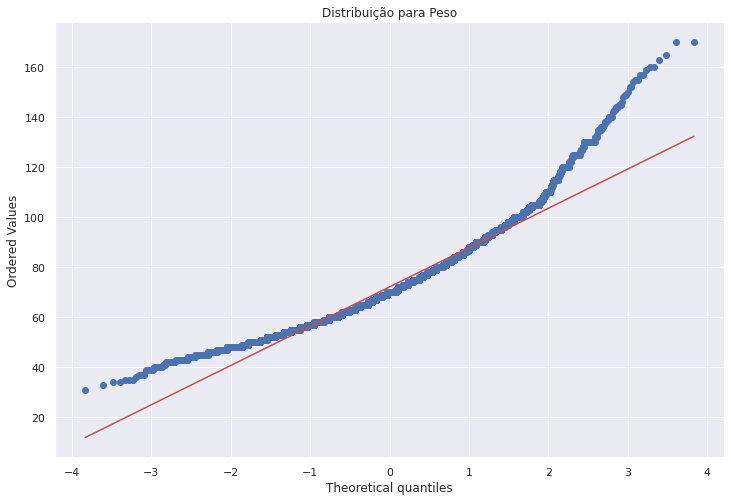

In [ ]:
# Generating a graph to check if the distribution is normal
# weight
fig, ax = plt.subplots()
stats.probplot(df_copy.weight, fit=True, plot=ax)
plt.title("Distribuição para Peso")
plt.show()

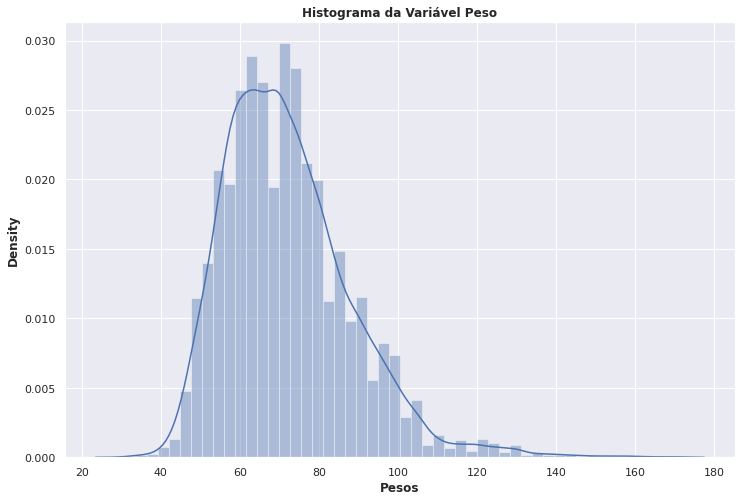

In [ ]:
#Histogram of the Weight Variable
sns.distplot(df_copy.weight);

plt.title('Histograma da Variável Peso', fontdict={'fontweight' : 'bold'});
plt.xlabel('Pesos', fontweight = 'bold');
plt.ylabel(ylabel = 'Density', fontweight = 'bold');

In [ ]:
# Running the Shapiro Wilk test
# The first value is the result of the statistic and the second argument is the p-value.
# Ho = The data are normally distributed
# H1 = The data are not normally distributed
# If the second term (p-value) is less than 0.05 (5%), the null hypothesis is rejected.
stats.shapiro(df_copy.weight)

(0.9469754099845886, 0.0)

The null hypothesis (H0) is rejected, as the p-value is less than 0.05. Therefore, the data do not have a normal distribution.

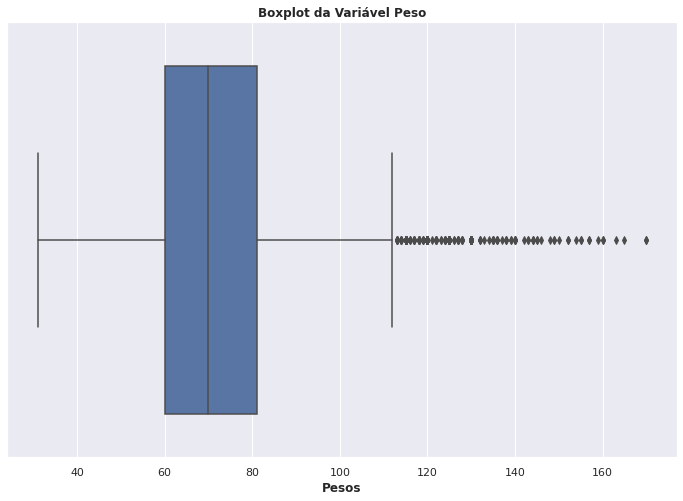

In [ ]:
#Boxplot of Weight Variable
sns.boxplot(df_copy.weight);

plt.title('Boxplot da Variável Peso', fontdict={'fontweight' : 'bold'});
plt.xlabel('Pesos', fontweight = 'bold');

##Compare the quantitative variables and describe which is more homogeneous

In [ ]:
df_stats

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),26.41177,26.00,25.0,5.40,20.43,1.11795
1,Altura (height),1.76694,1.76,1.8,0.11,6.40,0.16531
2,Peso (weight),72.07092,70.00,70.0,16.16,22.43,1.05906


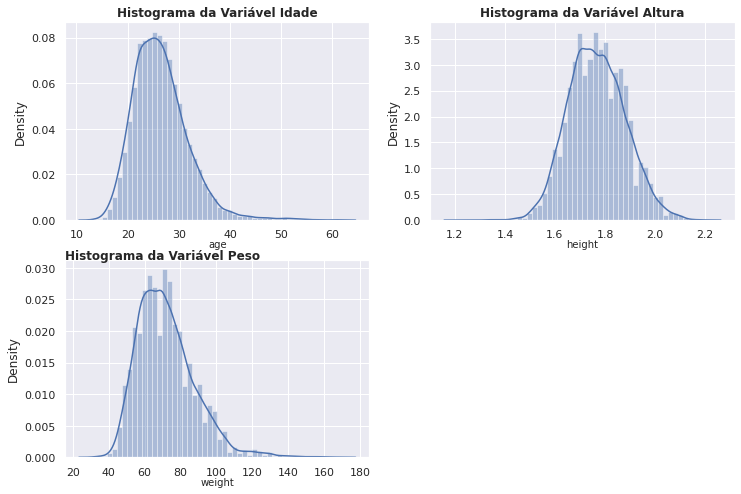

In [ ]:
#Histogram of age, height and weight
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
sns.distplot(df_copy.age, ax = ax1)
ax1.set_xlabel(xlabel = 'age', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Histograma da Variável Idade', fontdict={'fontweight' : 'bold'})

ax2 = fig.add_subplot(2,2,2)
sns.distplot(df_copy.height, ax = ax2)
ax2.set_xlabel(xlabel = 'height', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Histograma da Variável Altura', fontdict={'fontweight' : 'bold'})

ax3 = fig.add_subplot(2,2,3)
sns.distplot(df_copy.weight, ax = ax3)
ax3.set_xlabel(xlabel = 'weight', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Histograma da Variável Peso', loc = 'left', pad = 0.01, fontdict={'fontweight' : 'bold'})

plt.show()

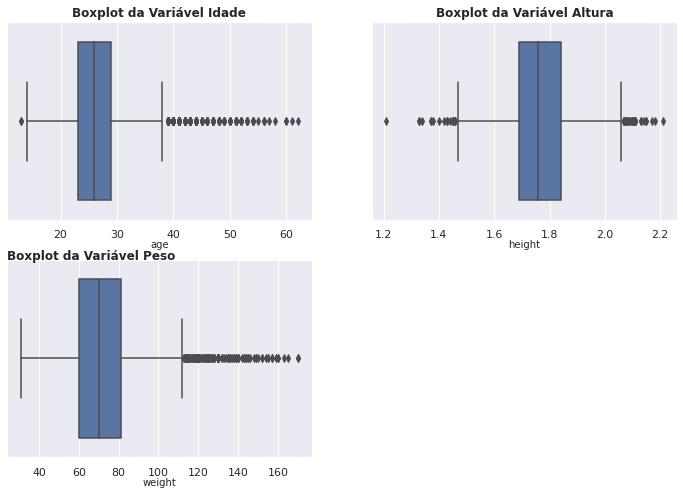

In [ ]:
#Boxplot of age, height and weight
fig = plt.figure()

ax1 =fig.add_subplot(2,2,1)
sns.boxplot(df_copy.age, ax = ax1)
ax1.set_xlabel(xlabel = 'age', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Boxplot da Variável Idade', fontdict={'fontweight' : 'bold'})

ax2 =fig.add_subplot(2,2,2)
sns.boxplot(df_copy.height, ax = ax2)
ax2.set_xlabel(xlabel = 'height', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Boxplot da Variável Altura', fontdict={'fontweight' : 'bold'})

ax3 =fig.add_subplot(2,2,3)
sns.boxplot(df_copy.weight, ax = ax3)
ax3.set_xlabel(xlabel = 'weight', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Boxplot da Variável Peso', loc = 'left', pad = 0.01, fontdict={'fontweight' : 'bold'})

plt.show()

Conclusion:
*   All numerical variables have *outliers*, however, only the weight variable has *outliers* at the upper end.
*   These *outliers* may indicate unusual characteristics in athletes participating in the Olympic Games, which show opposition to, for example: best weight and height ranges for specific sports, age ranges that generally denote the peak of human capacity in the practice of some sport, or who begin their Olympic career in their 20s, etc.
*   All numerical variables do not have a normal distribution, as can be seen in the tests performed and graphs generated.

##Calculate the respective 95% Confidence Intervals for each field in the data frame

In [ ]:
#95%CI for the variable *age*

inf, sup = norm.interval(0.95, loc = round(st.mean(df_copy.age),2 ), scale = round(st.pstdev(df_copy.age), 2 ) / np.sqrt(len(df_copy.age)) )

print ('Limite inferior de Idade:', round(inf, 5) )
print ('Limite superior de Idade:', round(sup, 5) )

Limite inferior de Idade: 26.30843
Limite superior de Idade: 26.51157


In [ ]:
#95%CI for the variable *height*

inf, sup = norm.interval(0.95, loc = round(st.mean(df_copy.height),2 ), scale = round(st.pstdev(df_copy.height), 2 ) / np.sqrt(len(df_copy.height)) )

print ('Limite inferior de Altura:', round(inf, 5) )
print ('Limite superior de Altura:', round(sup, 5) )

Limite inferior de Altura: 1.76793
Limite superior de Altura: 1.77207


In [ ]:
#95%CI for the variable *weight*

inf, sup = norm.interval(0.95, loc = round(st.mean(df_copy.weight),2 ), scale = round(st.pstdev(df_copy.weight), 2 ) / np.sqrt(len(df_copy.weight)) )

print ('Limite inferior de Peso:', round(inf, 5) )
print ('Limite superior de Peso:', round(sup, 5) )

Limite inferior de Peso: 71.76604
Limite superior de Peso: 72.37396


##Compare the mean of a numeric field in relation to a categorical field and answer whether there is a statistical difference at the 5% significance level

In [ ]:
novo_df = df_copy[df_copy.sport == 'aquatics']
novo_df

,nationality,sex,height,weight,sport,gold,silver,bronze,age
7,AUS,male,1.93,100.0,aquatics,0,0,0,24
14,USA,female,1.78,68.0,aquatics,1,1,0,19
26,SUD,male,1.81,72.0,aquatics,0,0,0,21
45,SEN,male,1.90,90.0,aquatics,0,0,0,27
64,USA,female,1.66,61.0,aquatics,0,0,0,26
...,...,...,...,...,...,...,...,...,...
11500,ISR,male,1.85,71.0,aquatics,0,0,0,19
11503,SRB,male,1.93,93.0,aquatics,1,0,0,33
11507,AUS,female,1.70,70.0,aquatics,0,0,0,25
11512,ISR,female,1.78,61.0,aquatics,0,0,0,19


In [ ]:
novo_df['total'] = sum_medals(novo_df)
novo_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nationality,sex,height,weight,sport,gold,silver,bronze,age,total
7,AUS,male,1.93,100.0,aquatics,0,0,0,24,0
14,USA,female,1.78,68.0,aquatics,1,1,0,19,2
26,SUD,male,1.81,72.0,aquatics,0,0,0,21,0
45,SEN,male,1.90,90.0,aquatics,0,0,0,27,0
64,USA,female,1.66,61.0,aquatics,0,0,0,26,0
...,...,...,...,...,...,...,...,...,...,...
11500,ISR,male,1.85,71.0,aquatics,0,0,0,19,0
11503,SRB,male,1.93,93.0,aquatics,1,0,0,33,1
11507,AUS,female,1.70,70.0,aquatics,0,0,0,25,0
11512,ISR,female,1.78,61.0,aquatics,0,0,0,19,0


In [ ]:
novo_df['total'][novo_df.total > 0].groupby(novo_df.sex).sum()

sex
female    185
male      150
Name: total, dtype: int64

In [ ]:
tab_contigencia = pd.crosstab(novo_df.sex,novo_df.total)
tab_contigencia

total,0,1,2,3,4,5,6
sex,,,,,,,
female,556,108,23,2,5,1,0
male,583,95,18,3,1,0,1


In [ ]:
qui, p, gl, esperado = chi2_contingency(tab_contigencia,correction=False)
print("Valores esperados")
print(esperado)
print('qui=%.3f, p=%.3f' % (qui, p))
if p > 0.05:
	print('Conclusão: as variáveis são independentes')
else:
	print('Conclusão: as variáveis são dependentes')

Valores esperados
[[5.67052292e+02 1.01063754e+02 2.04118911e+01 2.48925501e+00
  2.98710602e+00 4.97851003e-01 4.97851003e-01]
 [5.71947708e+02 1.01936246e+02 2.05881089e+01 2.51074499e+00
  3.01289398e+00 5.02148997e-01 5.02148997e-01]]
qui=6.923, p=0.328
Conclusão: as variáveis são independentes


Consideramos apenas o esporte aquático em relação ao gênero.

##Perform a crossover of two categorical fields and answer whether there is a statistical difference at the 5% significance level

In [ ]:
df_copy['total'] = sum_medals(df_copy)
df_copy

,nationality,sex,height,weight,sport,gold,silver,bronze,age,total
0,ESP,male,1.72,64.0,athletics,0,0,0,46,0
1,KOR,female,1.68,56.0,fencing,0,0,0,29,0
2,CAN,male,1.98,79.0,athletics,0,0,1,24,1
3,MDA,male,1.83,80.0,taekwondo,0,0,0,25,0
4,NZL,male,1.81,71.0,cycling,0,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,20,0
11534,CZE,female,1.73,63.0,athletics,0,0,0,29,0
11535,CHN,male,1.85,100.0,wrestling,0,0,0,25,0
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,27,0


In [ ]:
bd_female = df_copy.loc[df_copy.sex == "female"]
bd_male = df_copy.loc[df_copy.sex == "male"]
print(bd_female.shape)
print(bd_male.shape)

(4996, 10)
(5862, 10)


In [ ]:
alfa=0.05
média = np.mean(bd_female.total)
dp = np.std(bd_female.total)
print("Média feminina =",round(média,2))
print("Desvio-padrão feminina =",round(dp,2))
média = np.mean(bd_male.total)
dp = np.std(bd_male.total)
print("Média masculina =",round(média,2))
print("Desvio-padrão masculina =",round(dp,2))
t,p = ttest_ind(bd_female.total,bd_male.total)
print('t= %0.3f, p= %0.3f' % (t, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, as médias são estatisticamentes iguais ao nível de significância")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamentes diferentes ao nível de significância")

Média feminina = 0.19
Desvio-padrão feminina = 0.45
Média masculina = 0.17
Desvio-padrão masculina = 0.42
t= 2.298, p= 0.022
Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamentes diferentes ao nível de significância


We consider all sports in relation to gender.